# Dynamic Response of a SDoF system - analytical solution 

### Description: In some cases a single degree of freedom - SDoF - model can be used to model the structural behaviour. The response of a SDoF system under dynamic loads may be computed by different direct time integration schemes, which are presented here. The results are compared with the analytical solutions from basic structural dynamics. Some exercises are proposed. 

#### Students are advised to complete the exercises. 

##### Project: Structural Wind Engineering WS 21-22 Chair of Structural Analysis @ TUM - M. Péntek, A. Kodakkal, G. Martínez-López
        
Author : anoop.kodakkal@tum.de mate.pentek@tum.de

Created on:  15.11.2015

Last update: 08.11.2021

In [1]:
# import python modules
import time
import matplotlib.pyplot as plt
import numpy as np

# import own modules
#import structure_sdof as s_sdof

#### Creating the time instances as an array

The start time, end time and the number of time steps are specified here for generating the time series. 

In [2]:
# start time
start_time = 0.0
# end time
end_time = 5.0
# steps 
n_steps = 10000
# time step
delta_time = end_time / (n_steps-1)
# time series
# generate grid size vectors 1D
time_series = np.arange(start_time, end_time + delta_time, delta_time)

###### Structural setup 

In [3]:
# mass
m = 0.1
# eigenfrequency
eigen_f = 2.0
# stiffness
k = m * (eigen_f * 2 * np.pi)**2
# damping ratio
# zero damping in this case
xi = 0.00 
# damping coefficient
b = xi * 2.0 * np.sqrt(m * k)

######  Initial conditions

we start with all zero initial conditions

In [4]:
# displacement
u0 = 0.0
# velocity
v0 = 0.0
# acceleration
a0 = 0.0

###### Analytical solutions  

Analytical solutions are available at 

[A.K. Chopra, Dynamics of Structures: Theory and Applications to Earthquake Engineering, 
Person Prentice Hall, 2014](https://opac-ub-tum-de.eaccess.ub.tum.de/TouchPoint/perma.do?q=+1035%3D%22BV043635029%22+IN+%5B2%5D&v=tum&l=de)

[C. Petersen, Dynamik der Baukonstruktionen, 2017](https://link-springer-com.eaccess.ub.tum.de/book/10.1007%2F978-3-8348-2109-6) 


1. Undamped free vibration with initial displacement 

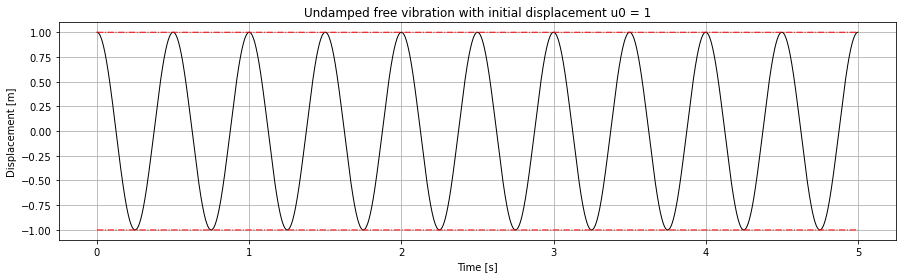

In [5]:
# undamped free oscillation with only initial displacement 2.1.3 page 40 in AK chopra 
omega = np.sqrt(k/m)
# initial conditions 
u0 = 1
u_max= np.sqrt(u0**2 + (v0/omega)**2)
disp_analytic_wo_ext_force = u0 * np.cos(np.multiply(omega, time_series)) + v0/omega * np.sin(np.multiply(omega, time_series))
disp_analytic_wo_ext_force_limit = u_max * np.ones(len(time_series))

# plotting 
plt.figure(num=2, figsize=(15, 4))
plt.title('Undamped free vibration with initial displacement u0 = ' + str(u0))
plt.plot(time_series, disp_analytic_wo_ext_force, "-k", lw=1)
# upper and lower limits as straight red dashed lines
plt.plot(time_series, disp_analytic_wo_ext_force_limit, "-.r", lw=1)
plt.plot(time_series, -disp_analytic_wo_ext_force_limit, "-.r", lw=1)
# x_axis_end = end_time
# plt.xlim([0, x_axis_end])
plt.ylabel('Displacement [m]')
plt.xlabel('Time [s]')
plt.grid(True)


2. Undamped free vibration with initial displacement and initial velocity

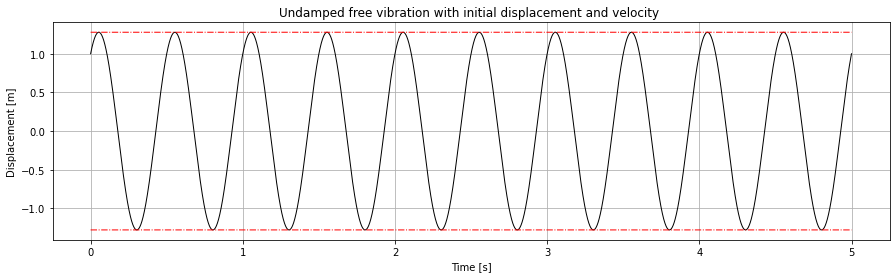

In [6]:
# undamped free oscillation with only initial displacement and initial velocity  2.1.3 page 40 in AK chopra 
omega = np.sqrt(k/m)
# initial conditions 
u0 = 1
v0 = 10 
u_max= np.sqrt(u0**2 + (v0/omega)**2)
disp_analytic_wo_ext_force = u0 * np.cos(np.multiply(omega, time_series)) + v0/omega * np.sin(np.multiply(omega, time_series))
disp_analytic_wo_ext_force_limit = u_max * np.ones(len(time_series))

# plotting 
plt.figure(num=2, figsize=(15, 4))
plt.title('Undamped free vibration with initial displacement and velocity ')
plt.plot(time_series, disp_analytic_wo_ext_force, "-k", lw=1)
# upper and lower limits as straight red dashed lines
plt.plot(time_series, disp_analytic_wo_ext_force_limit, "-.r", lw=1)
plt.plot(time_series, -disp_analytic_wo_ext_force_limit, "-.r", lw=1)
# x_axis_end = end_time
# plt.xlim([0, x_axis_end])
plt.ylabel('Displacement [m]')
plt.xlabel('Time [s]')
plt.grid(True)


3. Under damped free vibration with initial displacement and initial velocity

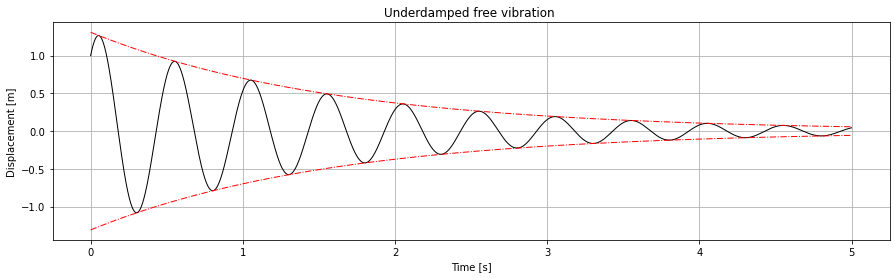

In [7]:
# under damped free oscillation with only initial displacement and initial velocity  2.2.4 page 49 in AK chopra 
omega = np.sqrt(k/m)
# damping in this case
xi = 0.05
# damping coefficient
b = xi * 2.0 * np.sqrt(m * k)
# dampled natural frequency 
omega_d = omega*np.sqrt(1-xi**2)
# initial conditions 
u0 = 1
v0 = 10 
cos_coeff = u0 
sin_coeff = (v0 + xi * omega * u0 )/ omega_d
u_max= np.sqrt(cos_coeff**2 + sin_coeff**2)
disp_analytic_wo_ext_force = np.exp(-xi*omega*time_series)*(cos_coeff * np.cos(np.multiply(omega, time_series)) \
            + sin_coeff * np.sin(np.multiply(omega, time_series)))
disp_analytic_wo_ext_force_limit = u_max *np.exp(-xi*omega*time_series)* np.ones(len(time_series))

# plotting 
plt.figure(num=2, figsize=(15, 4))
plt.title('Underdamped free vibration ')
plt.plot(time_series, disp_analytic_wo_ext_force, "-k", lw=1)
# upper and lower limits as straight red dashed lines
plt.plot(time_series, disp_analytic_wo_ext_force_limit, "-.r", lw=1)
plt.plot(time_series, -disp_analytic_wo_ext_force_limit, "-.r", lw=1)
# x_axis_end = end_time
# plt.xlim([0, x_axis_end])
plt.ylabel('Displacement [m]')
plt.xlabel('Time [s]')
plt.grid(True)


4. Undamped force vibration under harmonic excitation with no initial displacement

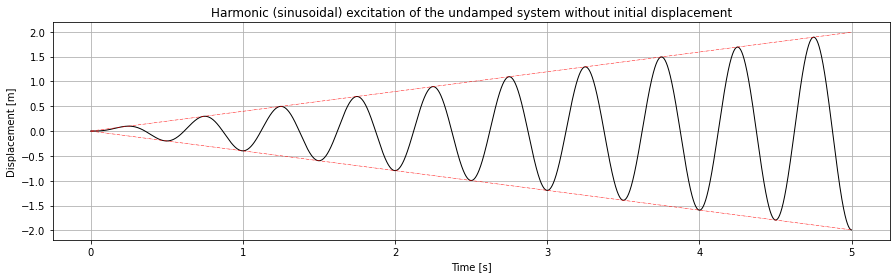

In [8]:

# undamped harmonic oscillation with only external force eq 3.1.6a page 66 AK chopra
omega = np.sqrt(k/m)

# initial conditions 
u0 = 0
v0 = 0
# forcing function # sin P0sin(wt) 
ampl_sin = 1 
omega_sin = 12.56 # resonance case 

cos_coeff = u0 
sin_coeff = (v0 / omega) - (ampl_sin / k) * ((omega_sin/omega)/(1-(omega_sin/omega)**2))
steady_coeff = ampl_sin / k * (1/(1-(omega_sin/omega)**2))
                                         
disp_analytic_w_ext_force = cos_coeff * np.cos(omega * time_series) \
            + sin_coeff * np.sin(omega * time_series) \
            + steady_coeff * np.sin(omega_sin * time_series)
disp_analytic_w_ext_force_limit = ampl_sin /2/k * (omega * time_series)



plt.figure(num=3, figsize=(15, 4))
plt.title('Harmonic (sinusoidal) excitation of the undamped system without initial displacement')
plt.plot(time_series, disp_analytic_w_ext_force, "-k", lw=1)
# upper and lower limits as straight red dashed lines
plt.plot(time_series, disp_analytic_w_ext_force_limit, "-.r", lw=0.5)
plt.plot(time_series, -disp_analytic_w_ext_force_limit, "-.r", lw=0.5)
# plt.xlim([0, x_axis_end])
plt.ylabel('Displacement [m]')
plt.xlabel('Time [s]')
plt.grid()

5. Damped force vibration under harmonic excitation with no initial displacement


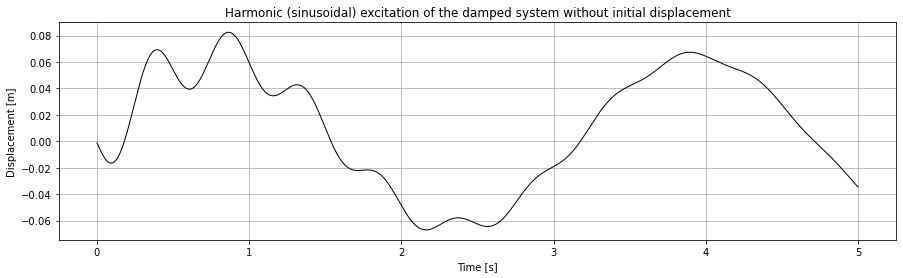

In [9]:

# undamped harmonic oscillation with only external force eq 3.2.4 page 72 AK chopra
omega = np.sqrt(k/m)
# damping in this case
xi = 0.05
# damping coefficient
b = xi * 2.0 * np.sqrt(m * k)

# plotting 
# initial conditions 
u0 = 0
v0 = 0
# forcing function # sin P0sin(wt) 
ampl_sin = 1 
omega_sin = 2
beta = omega_sin/omega 

A_coeff = u0 
B_coeff = (v0 / omega) - (ampl_sin / 2/k) 

C_coeff = (ampl_sin/k) * ((1-beta**2)/((1-beta**2))**2 + (2 *xi*beta)**2)
D_coeff = (ampl_sin/k) * (-2*xi*beta/((1-beta**2))**2 + (2 *xi*beta)**2)    

disp_analytic_w_ext_force = np.exp(-xi*omega*time_series)*(A_coeff * np.cos(omega * time_series) \
            + B_coeff * np.sin(omega*time_series)) \
            + C_coeff * np.sin(omega_sin*time_series) \
            + D_coeff * np.cos(omega_sin*time_series)

plt.figure(num=3, figsize=(15, 4))
plt.title('Harmonic (sinusoidal) excitation of the damped system without initial displacement')
plt.plot(time_series, disp_analytic_w_ext_force, "-k", lw=1)
# plt.xlim([0, x_axis_end])
plt.ylabel('Displacement [m]')
plt.xlabel('Time [s]')
plt.grid()